# <font face = 'Impact' color = '#FFAEBC' > Getting Ready with our Second Mini-Project <font/>
#### <font face = 'Times New Roman' color = '#A16AE8'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
In this notebook, we will be importing packages and use them to load and explore data sets. We will be using the pandas package to load datasets and qdesc to explore both categorical and numerical variables. Functions to be used include pd.read_excel, pd.read_csv, head, qd.desc, qd.normcheck_dashboard, qd.freqdist_a, and qd.freqdist_to_excel.

# <font face = 'Impact' color = '#FFAEBC' > Exploring Sleep Hours during Weeknights <font/>

In [21]:
# Importing the necessary packages for us to use certain functions.
import pandas as pd
import numpy as np
import qdesc as qd

In [22]:
!pip install qdesc

In [43]:
# Loading a data set (SleepData.xlsx) and storing it into a variable.
sleep_df = pd.read_excel('SleepData.xlsx')

In [53]:
# Check the first 5 rows of the dataframe
sleep_df.head(7)

,Sex,Age,MaritalStatus,Employment,sleep(hrs)/weeknights
0,Male,30,Single,Permanent,8.85
1,Female,58,Married,Permanent,8.76
2,Female,60,Single,Permanent,8.49
3,Male,43,Single,Permanent,8.85
4,Female,43,Single,Permanent,8.73
5,Female,32,Married,Permanent,8.70
6,Male,45,Single,Permanent,8.36


In [82]:
# Check the information of the dataframe
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    671 non-null    object 
 1   Age                    671 non-null    int64  
 2   MaritalStatus          671 non-null    object 
 3   Employment             671 non-null    object 
 4   SleepHours_Weeknights  671 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 26.3+ KB


In [83]:
# Using the desc function from the qdesc package to perform descriptive analysis.
qd.desc(sleep_df)

,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
Age,671.0,49.80,19.36,49.00,17.00,18.00,84.00,7.38,0.78
SleepHours_Weeknights,671.0,7.63,1.39,8.34,0.98,4.52,9.88,35.70,0.78


In [61]:
# Generate descriptive analysis for sleep hours when grouped by sex.
def apply_qd_desc_to_series(series):
    return qd.desc(series.to_frame())

display(sleep_df.groupby('Sex')['SleepHours_Weeknights'].apply(apply_qd_desc_to_series))

,,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
Sex,,,,,,,,,,
Female,Female,350.0,7.67,1.36,8.33,0.96,4.52,9.88,17.14,0.78
Male,Male,321.0,7.57,1.43,8.36,0.99,4.66,9.64,18.70,0.78


In [63]:
# Generate descriptive analysis for sleep hours when grouped by employment.
display(sleep_df.groupby('Employment')['SleepHours_Weeknights'].apply(apply_qd_desc_to_series))

,,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
Employment,,,,,,,,,,
Permanent,Permanent,352.0,8.87,0.32,8.86,0.22,7.96,9.88,0.15,0.78
Probationary,Probationary,319.0,6.26,0.60,6.22,0.40,4.52,7.90,0.36,0.78


In [64]:
# Generate descriptive analysis for sleep hours when grouped by marital status.
display(sleep_df.groupby('MaritalStatus')['SleepHours_Weeknights'].apply(apply_qd_desc_to_series))

,,count,mean,std,median,MAD,min,max,AD_stat,5% crit_value
MaritalStatus,,,,,,,,,,
Married,Married,333.0,7.67,1.40,8.44,0.88,4.66,9.64,19.32,0.78
Single,Single,338.0,7.58,1.39,8.26,1.01,4.52,9.88,16.56,0.78



--- Variable: Age ---
  Anderson-Darling Statistic : 7.3813
  Critical Value (@ 5.0%) : 0.7820
  Decision : Reject Null


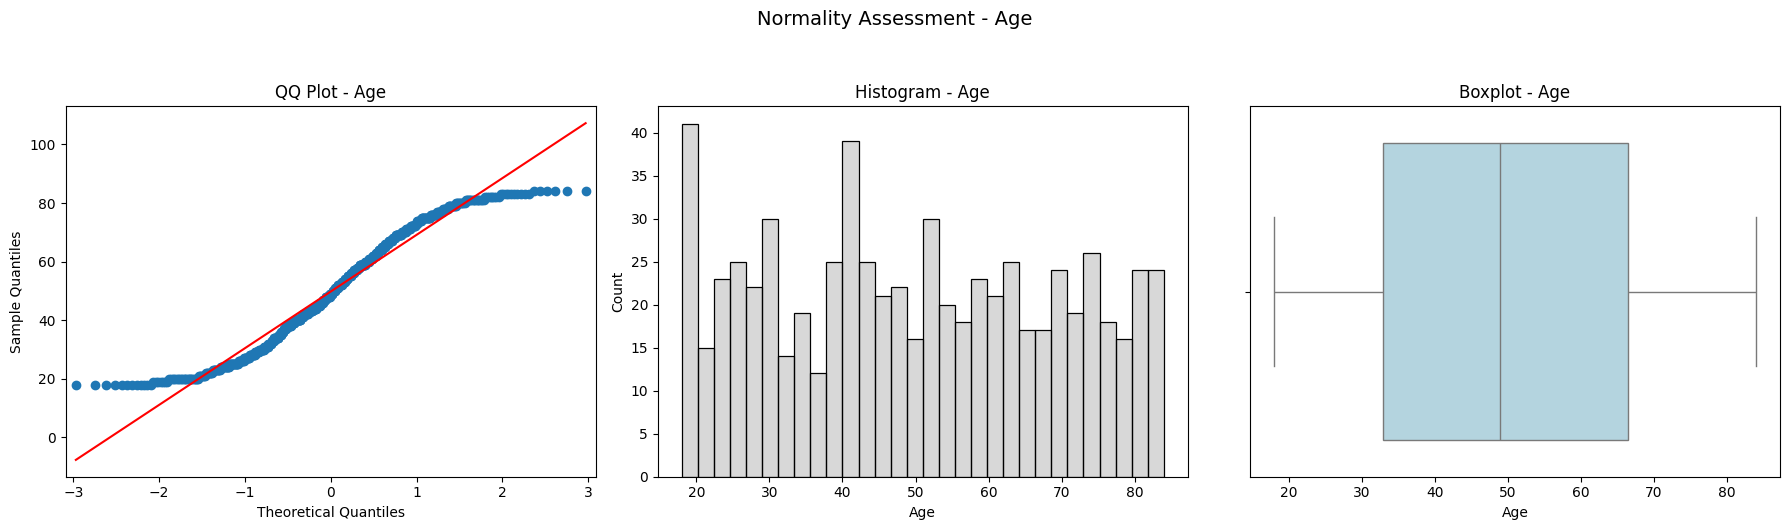


--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 35.6977
  Critical Value (@ 5.0%) : 0.7820
  Decision : Reject Null


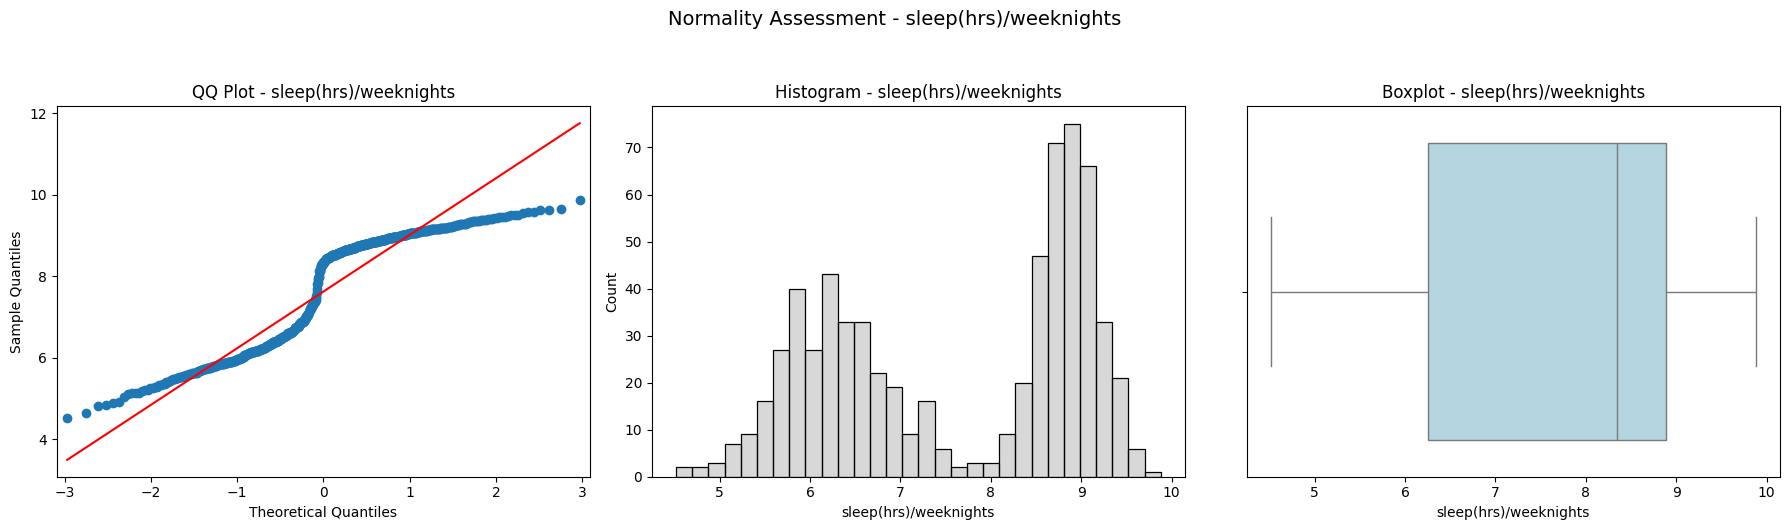

None

In [50]:
# Use the desc function from the qdesc package to explore the data for assumption of normality.
display(qd.normcheck_dashboard(sleep_df))

In [56]:
# Slicing the data frame to only include the single.
single_df = sleep_df[sleep_df['MaritalStatus'] == 'Single'].copy()

In [57]:
# Confirm that the subset would only include those who are single.
display(single_df['MaritalStatus'].unique())

array(['Single'], dtype=object)


--- Variable: Age ---
  Anderson-Darling Statistic : 3.0459
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


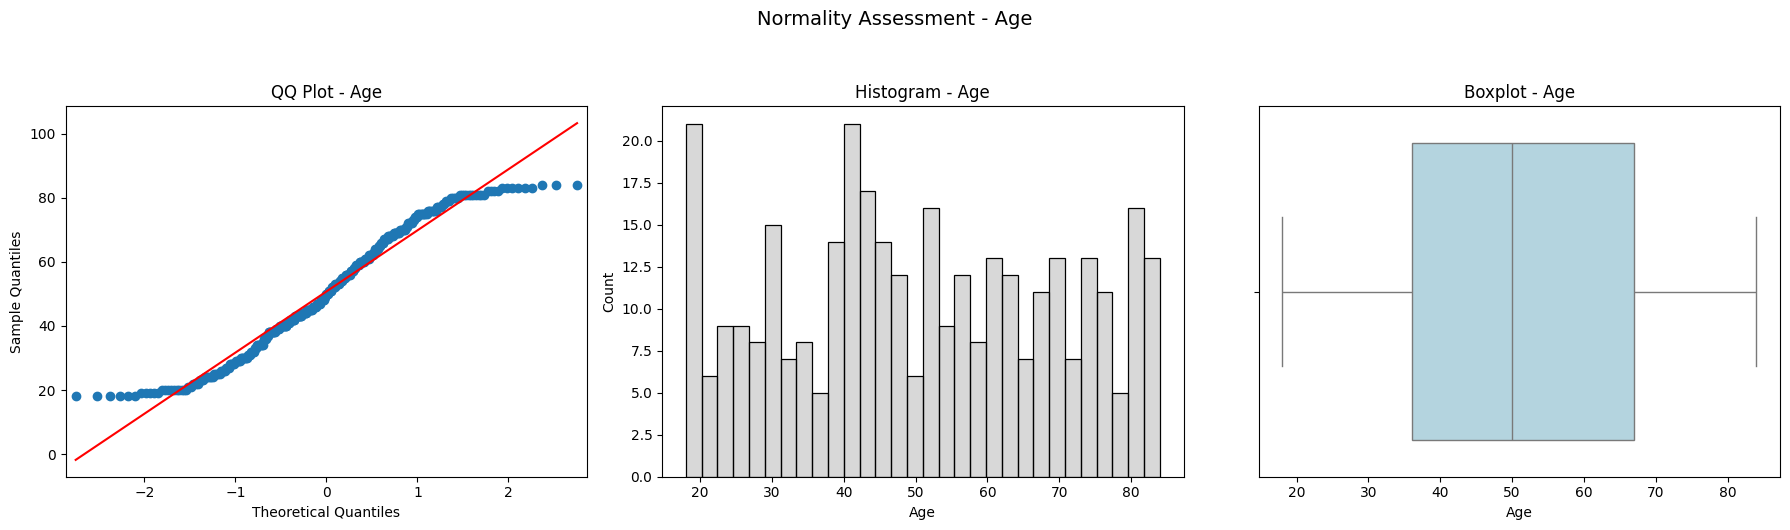


--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 16.5637
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


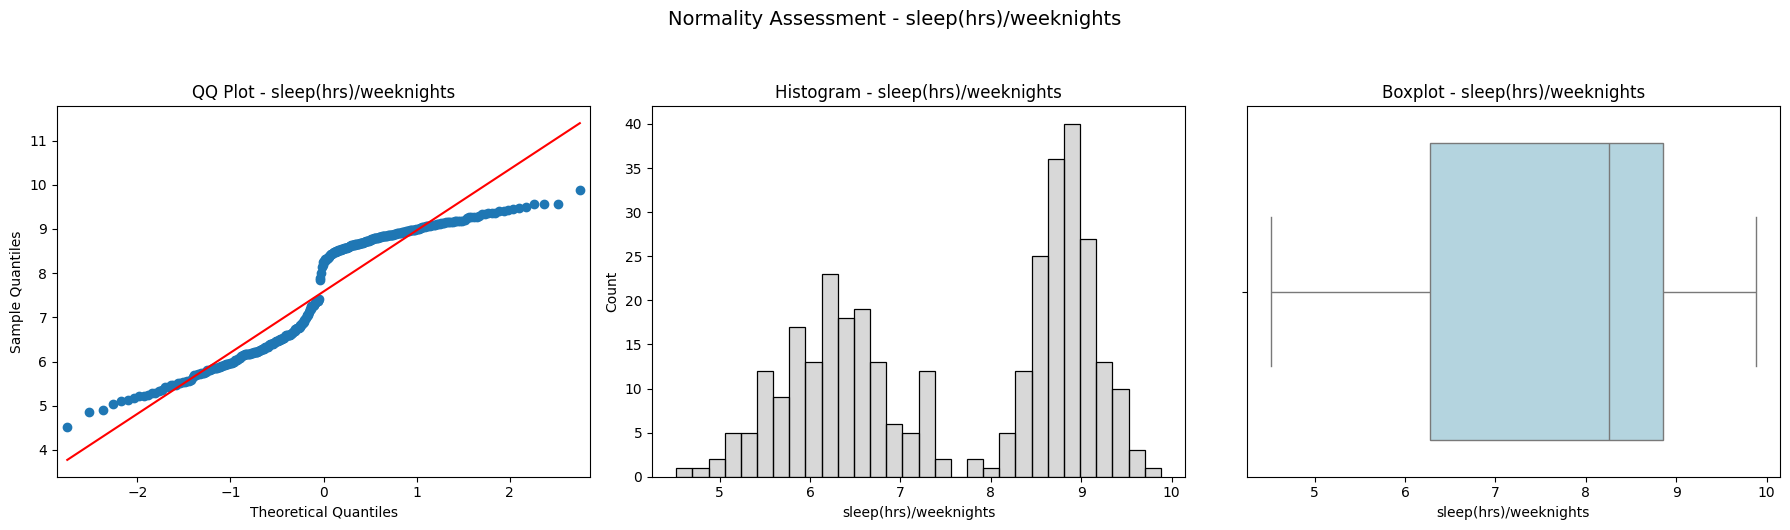

None

In [65]:
# Use the qdesc package to explore the data (only those who are Single) for assumption of normality.
display(qd.normcheck_dashboard(single_df))

In [67]:
# Slicing the data frame to only include the married.
married_df = sleep_df[sleep_df['MaritalStatus'] == 'Married'].copy()

In [68]:
# Confirm that the subset is all married.
display(married_df['MaritalStatus'].unique())

array(['Married'], dtype=object)


--- Variable: Age ---
  Anderson-Darling Statistic : 4.7098
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


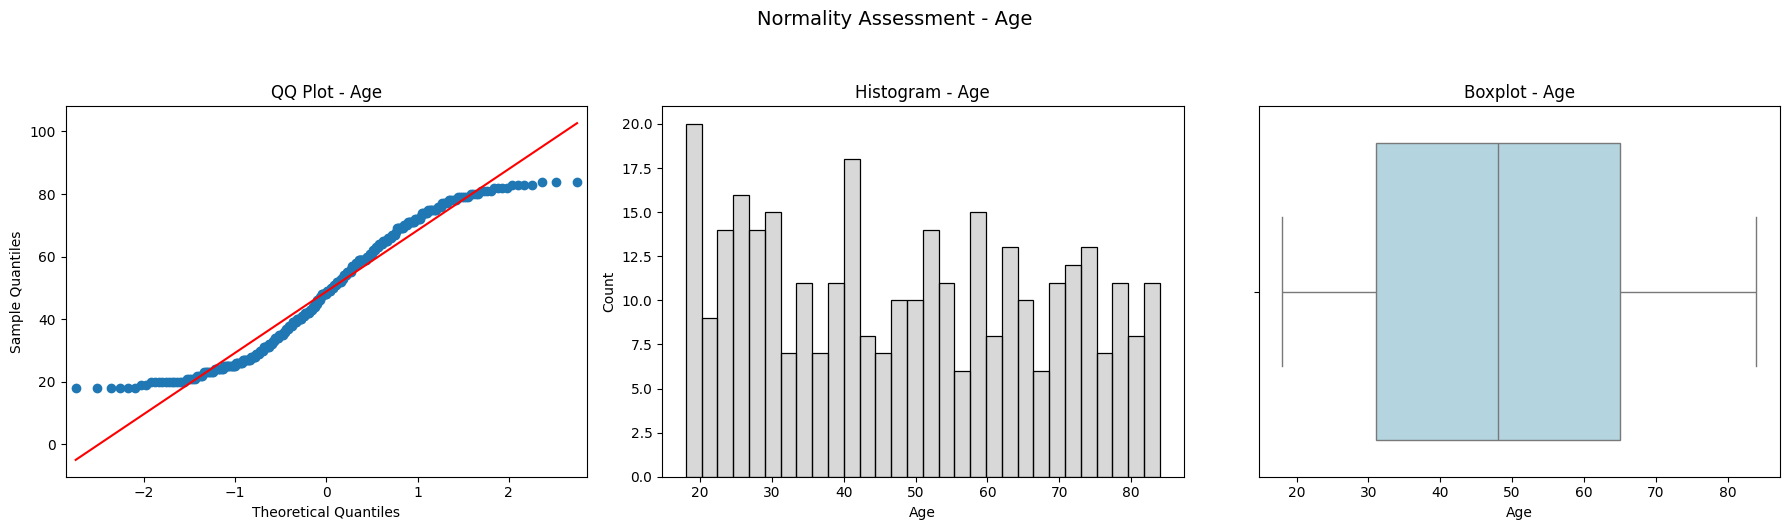


--- Variable: SleepHours_Weeknights ---
  Anderson-Darling Statistic : 19.3198
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


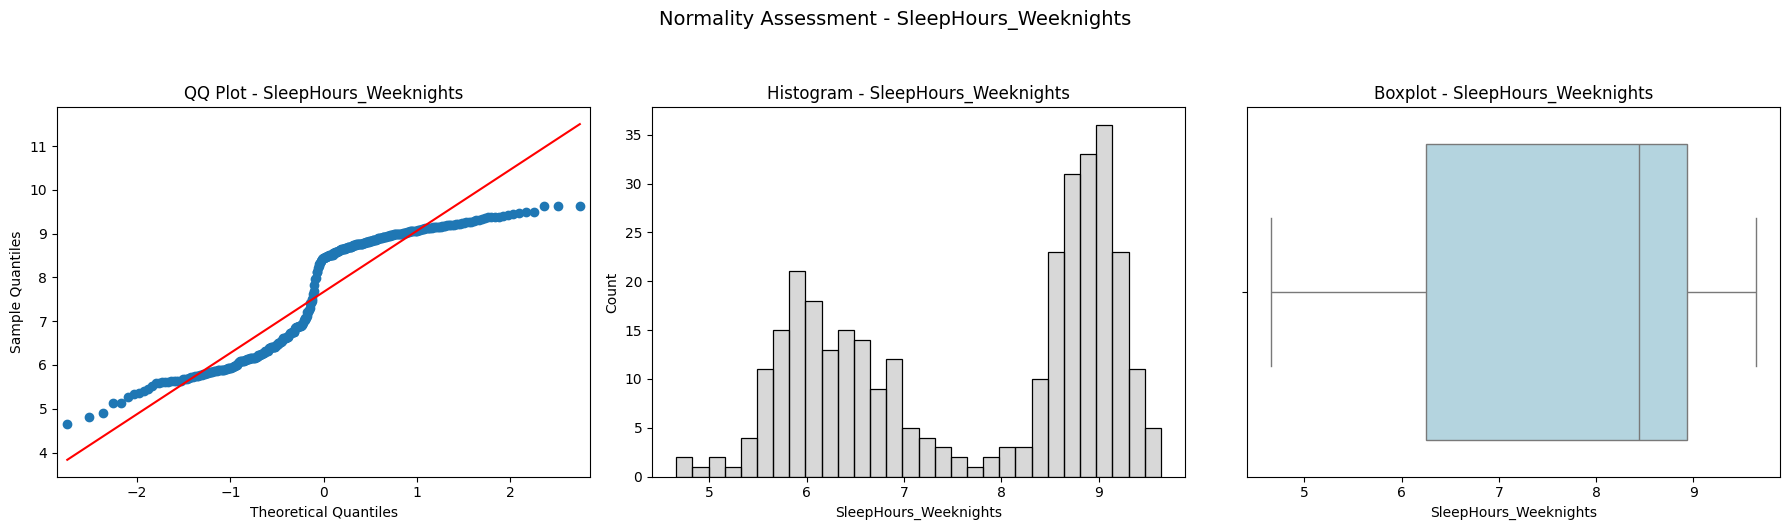

None

In [69]:
# Use the qdesc package to explore the data for assumption of normality.
display(qd.normcheck_dashboard(married_df))

In [74]:
# Generate a frequency distribution for a specified variable: Sex
display(sleep_df['Sex'].value_counts())

,count
Sex,
Female,350
Male,321


In [75]:
# Generate a frequency distribution for a specified variable: Employment
display(sleep_df['Employment'].value_counts())

,count
Employment,
Permanent,352
Probationary,319


In [76]:
# Generate a frequency distribution for a specified variable: Marital Status
display(sleep_df['MaritalStatus'].value_counts())

,count
MaritalStatus,
Single,338
Married,333


In [78]:
# Generate frequency distribution for all the categorical features from the said data frame.
categorical_cols = sleep_df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    print(f"Frequency distribution for {col}:")
    display(sleep_df[col].value_counts())
    print("\n") # Add a newline for better readability between distributions

Frequency distribution for Sex:


,count
Sex,
Female,350
Male,321




Frequency distribution for MaritalStatus:


,count
MaritalStatus,
Single,338
Married,333




Frequency distribution for Employment:


,count
Employment,
Permanent,352
Probationary,319


In [81]:
# Generating a frequency distribution but this time have it stored in an excel file and organized
# on a per sheet basis per categorical feature.
qd.freqdist_to_excel(sleep_df, 'frequency_distributions.xlsx')

Frequency distributions written to frequency_distributions.xlsx
